In [78]:
import pandas as pd
import numpy as np
import copy
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

from sklearn.mixture import GaussianMixture

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift, MiniBatchKMeans, OPTICS
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA, TruncatedSVD

In [58]:
data = pd.read_csv('vitrina_final_clustering.csv', sep=';')

df = copy.deepcopy(data)

In [62]:
print(df.shape)
df

(43724, 37)


,Абсолютная маржа_buyed,Маржа_buyed,Средняя маржа_buyed,Средний чек_buyed,Кол-во чеков_buyed,Кол-во товаров_buyed,Среднее кол-во товаров в чеке_buyed,Кол-во уникальных клиентов_buyed,Ценность клиента_buyed,Абсолютная маржа_all,...,ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,Безналичная,Наличная,ИнтернетДоставка,Калуга,Москва,Ростов-на-Дону,Саратов,Другой
0,2271,0.604150,2271.0,4819,1,7,7,1,2271,2729,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2176,0.654436,2176.0,3325,1,1,1,1,2176,2176,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,204,0.386364,204.0,528,1,4,4,1,204,204,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,759,0.345628,379.5,1147,2,6,3,1,759,1784,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1510,0.242026,755.0,3449,2,9,4,1,1510,1649,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43719,1062,0.743697,1062.0,1477,1,1,1,1,1062,1062,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
43720,217,0.333846,217.0,3560,1,1,1,1,217,217,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
43721,148,0.334086,148.0,542,1,1,1,1,148,148,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
43722,38,0.101333,38.0,474,1,1,1,1,38,38,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [55]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(df)

## K-means
### Определение количества кластеров для K-means методом локтя 

In [8]:
score = []
for k in range(1, 11):
    kmeanModel = KMeans(n_clusters = k, max_iter=400, n_init=15, random_state=42).fit(X)
    score.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

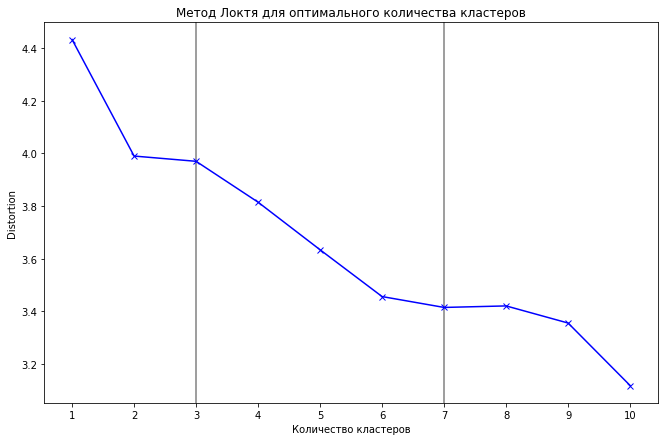

In [12]:
plt.figure(figsize=(11, 7))

plt.axvline(3, 0, 1, color='grey')
plt.axvline(7, 0, 1, color='grey')
K = range(1, 11)
plt.plot(K, score, 'bx-')

plt.xticks(np.arange(1, 11, step = 1))
plt.xlabel('Количество кластеров')
plt.ylabel('Distortion')
plt.title('Метод Локтя для оптимального количества кластеров')
plt.show()

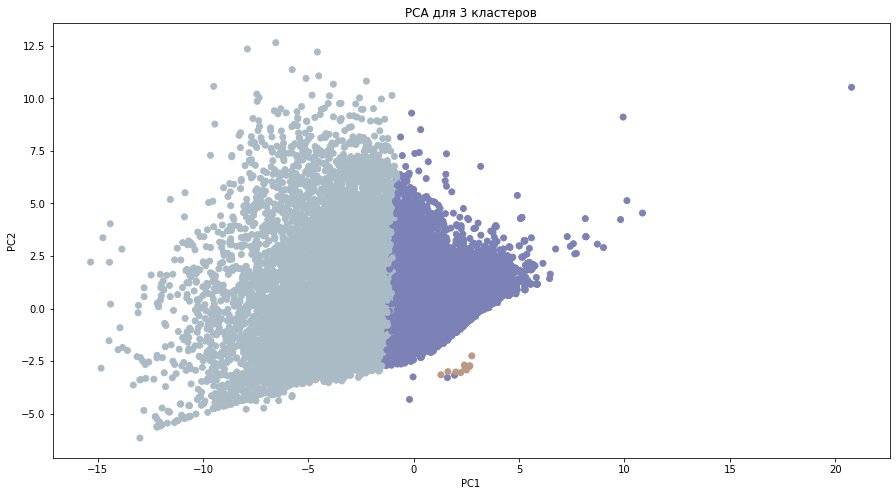

In [6]:
# Для PCA и сама модель K-means
X_pca = PCA(n_components=2).fit_transform(X);
kmeanModel = KMeans(n_clusters = 3, max_iter=400, n_init=15, random_state=42).fit(X)

# График
np.random.seed(60)
colors = np.sqrt(np.random.randint(0, 180, size=(3, 3))/270)
c_arr = np.array(list(map(lambda x: colors[x], list(kmeanModel.labels_))))

plt.figure(figsize=(15, 8))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA для 3 кластеров')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=c_arr)

In [17]:
silhouette_score(X, kmeanModel.fit_predict(X))

0.2834945343000656

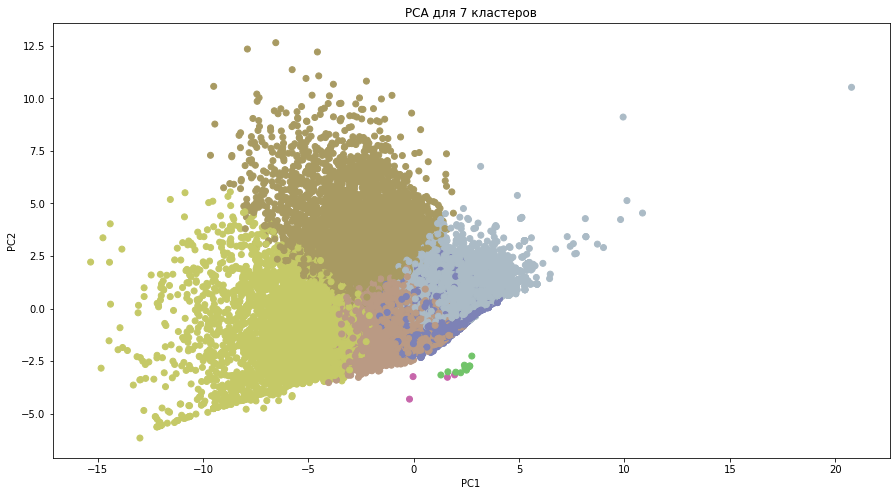

In [28]:
# Для PCA и сама модель K-means
X_pca = PCA(n_components=2).fit_transform(X);
kmeanModel = KMeans(n_clusters = 7, max_iter=400, n_init=15, random_state=42).fit(X)

# График
np.random.seed(60)
colors = np.sqrt(np.random.randint(0, 180, size=(7, 3))/270)
c_arr = np.array(list(map(lambda x: colors[x], list(kmeanModel.labels_))))

plt.figure(figsize=(15, 8))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA для 7 кластеров')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=c_arr)

In [24]:
silhouette_score(X, kmeanModel.labels_)

0.15709916642235572

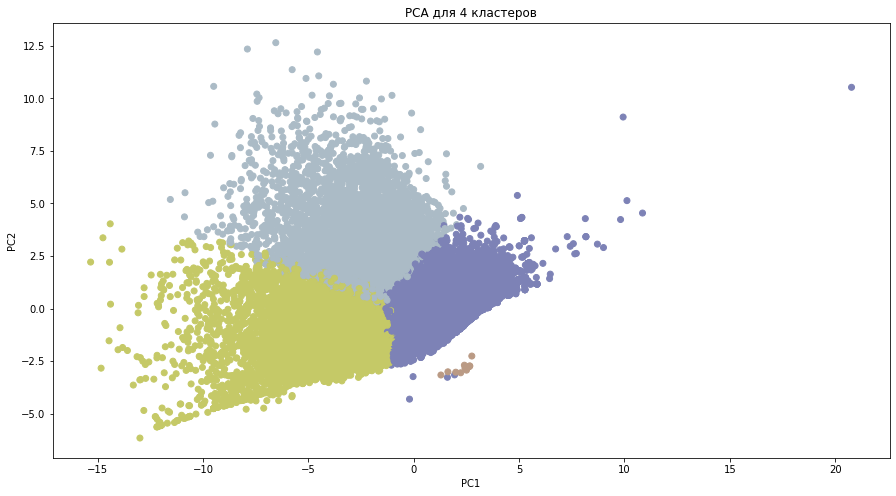

In [31]:
# Для PCA и сама модель K-means
X_pca = PCA(n_components=2).fit_transform(X);
kmeanModel = KMeans(n_clusters = 4, max_iter=400, n_init=15, random_state=42).fit(X)

np.random.seed(60)
colors = np.sqrt(np.random.randint(0, 180, size=(4, 3))/270)
c_arr = np.array(list(map(lambda x: colors[x], list(kmeanModel.labels_))))

plt.figure(figsize=(15, 8))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA для 4 кластеров')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=c_arr)

In [53]:
X

array([[ 1.78499748,  1.61622318,  2.69117525, ..., -0.00478239,
         0.        , -0.02015614],
       [ 1.67746407,  1.85070625,  2.54366119, ..., -0.00478239,
         0.        , -0.02015614],
       [-0.55470332,  0.60068859, -0.51842006, ..., -0.00478239,
         0.        , -0.02015614],
       ...,
       [-0.61809144,  0.35691776, -0.60537571, ..., -0.00478239,
         0.        , -0.02015614],
       [-0.74260382, -0.72840325, -0.77618146, ..., -0.00478239,
         0.        , -0.02015614],
       [-0.72109713, -0.37032491, -0.74667865, ..., -0.00478239,
         0.        , -0.02015614]])

In [32]:
silhouette_score(X, kmeanModel.labels_)

0.27511454864969187

In [7]:
score_silhoutte_kmean = []
score_davies_bouldin_kmean = []
calinski_harabasz_score_kmean = []

for k in range(2, 12):
    kmeanModel = KMeans(n_clusters = k, max_iter=400, n_init=15, random_state=42).fit(X)
    labels_kmean = kmeanModel.labels_
    score_silhoutte_kmean.append(silhouette_score(X, labels_kmean))
    score_davies_bouldin_kmean.append(davies_bouldin_score(X, labels_kmean))
    calinski_harabasz_score_kmean.append(calinski_harabasz_score(X, labels_kmean))

In [8]:
print(score_silhoutte_kmean, 
score_davies_bouldin_kmean, 
calinski_harabasz_score_kmean) 

[0.28173974155292253, 0.28348579539228624, 0.27511454864969187, 0.1555989377171557, 0.1611680377059907, 0.15709916642235572, 0.16951836029578937, 0.17412677903683774, 0.2243512874549609, 0.2276771369183964] [1.8221445620282422, 1.2372466009374214, 1.4235834277559882, 1.5859719994289434, 1.6054571824989312, 1.409309613400746, 1.2135073729760344, 1.2751034645736024, 1.2209451299684704, 1.0721910657692153] [7467.687374672186, 5405.388910354346, 4856.6800160628045, 4636.1961378527, 4187.067055339316, 4205.34585075796, 4045.3953459975646, 3948.9200162822053, 3932.0432759451596, 4039.162289766849]


In [87]:
score_silhoutte_kmean = [0.28173974155292253, 0.28348579539228624, 0.29311454864969187, 0.1555989377171557, 0.1611680377059907, 0.15709916642235572, 0.16951836029578937, 0.17412677903683774, 0.2243512874549609, 0.2276771369183964] 
score_davies_bouldin_kmean = [1.8221445620282422, 1.2372466009374214, 1.4235834277559882, 1.5859719994289434, 1.6054571824989312, 1.409309613400746, 1.2135073729760344, 1.2751034645736024, 1.2209451299684704, 1.0721910657692153] 
calinski_harabasz_score_kmean = [7467.687374672186, 5405.388910354346, 4856.6800160628045, 4636.1961378527, 4187.067055339316, 4205.34585075796, 4045.3953459975646, 3948.9200162822053, 3932.0432759451596, 4039.162289766849]

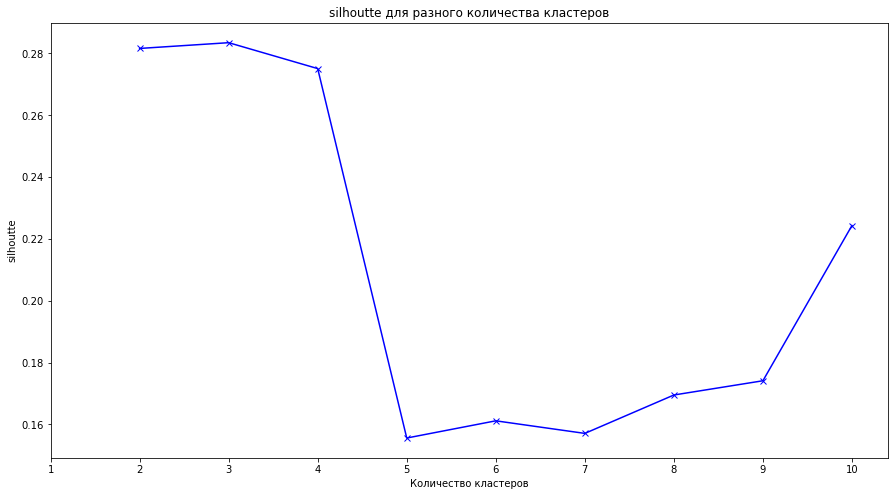

In [37]:
plt.figure(figsize=(15, 8))

# plt.axvline(3, 0, 1, color='grey')
# plt.axvline(7, 0, 1, color='grey')
K = range(2, 11)
plt.plot(K, score_silhoutte_kmean, 'bx-')

plt.xticks(np.arange(1, 11, step = 1))
plt.xlabel('Количество кластеров')
plt.ylabel('silhoutte')
plt.title('silhoutte для разного количества кластеров')
plt.show()

# Иерархическая кластеризация 

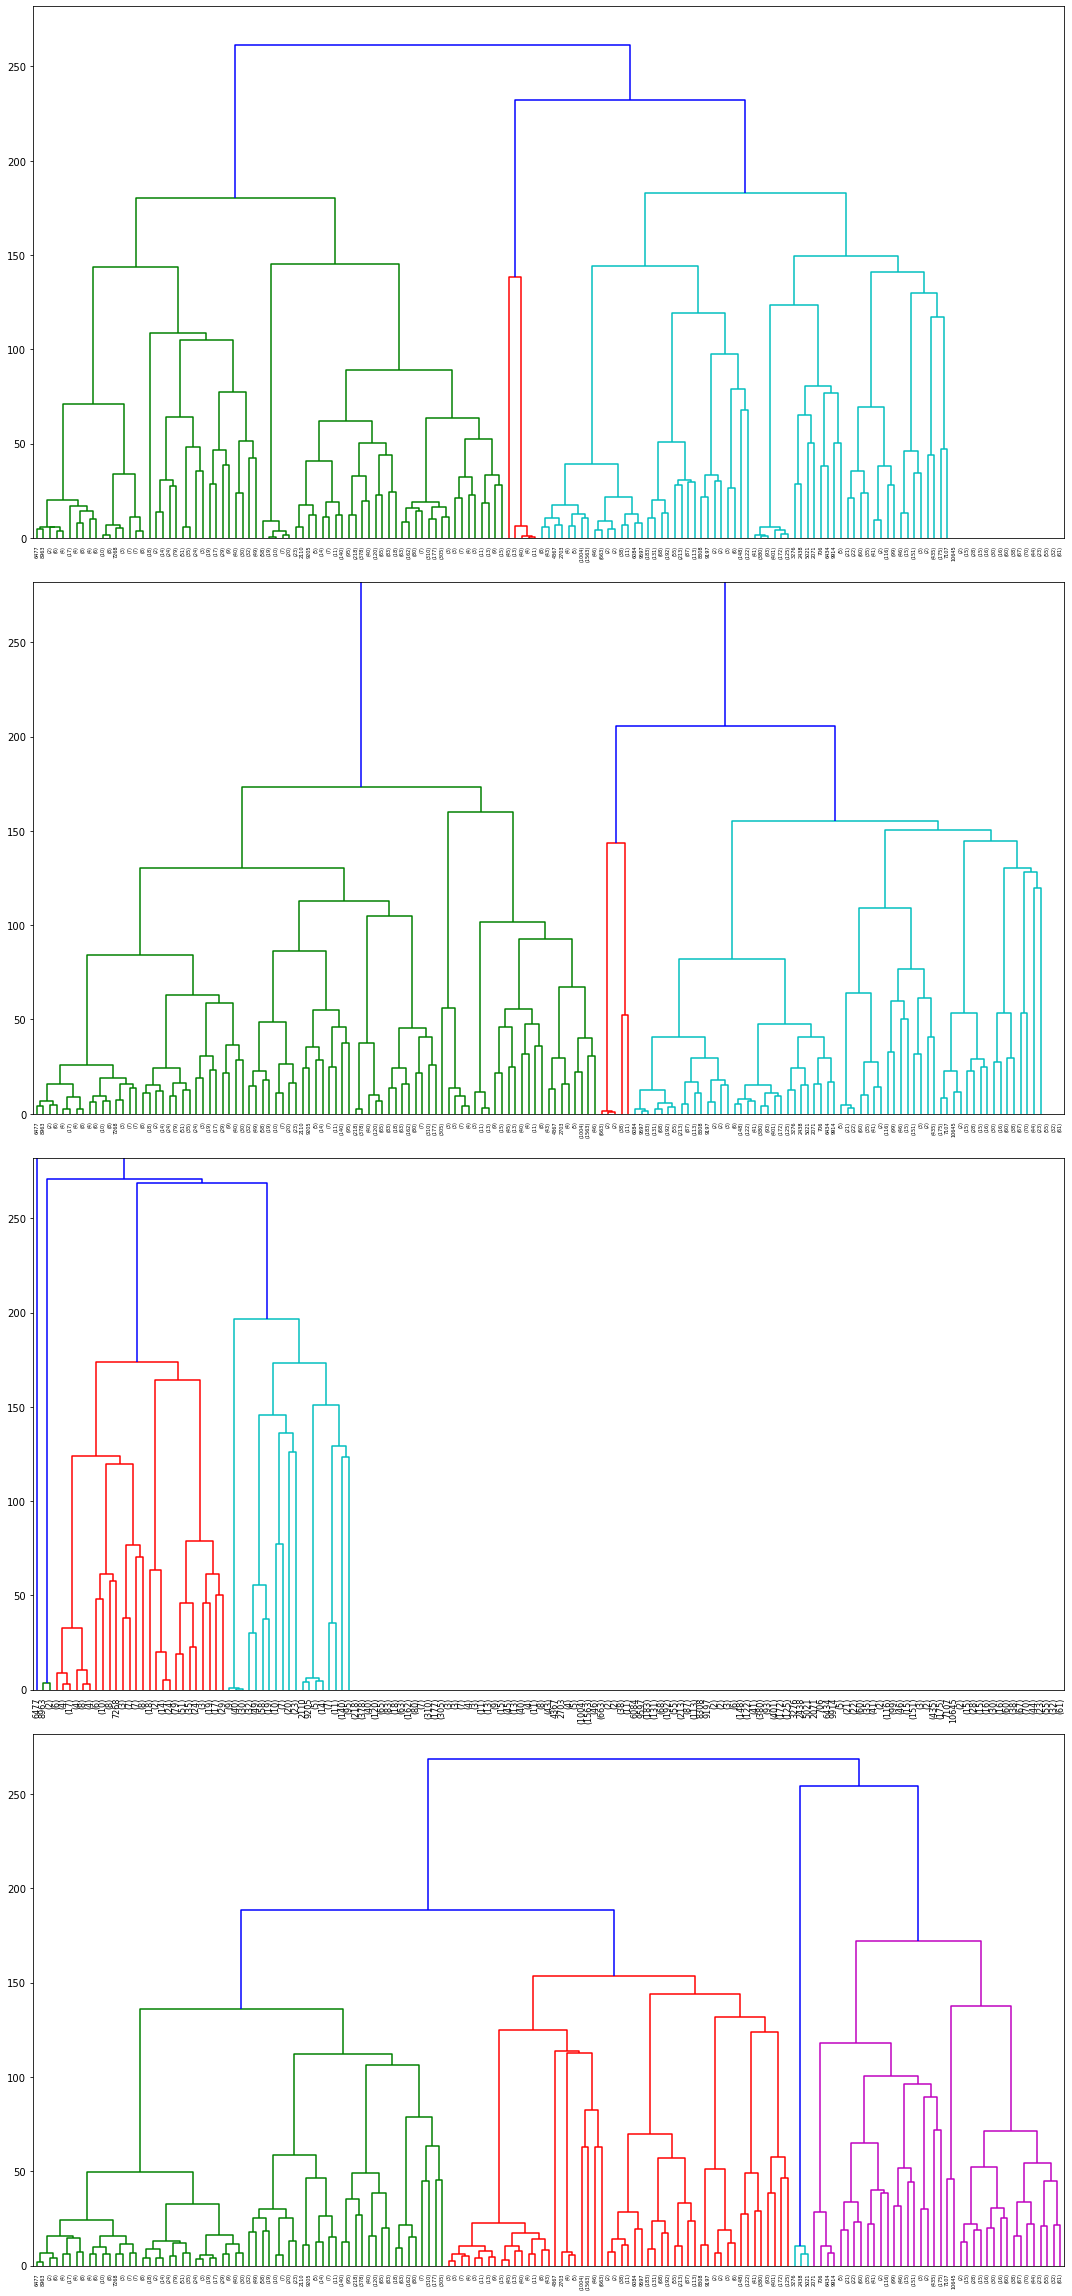

In [40]:
import scipy.cluster.hierarchy as shc

shuffled = np.copy(X)
np.random.shuffle(shuffled)
splits = np.split(shuffled, 4) 

fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True, sharey=True, figsize=(15, 32))

all_links = []
for i, s in enumerate(splits):
    links = shc.linkage(s, method='ward')
    all_links.append(links)
    dend = shc.dendrogram(links, truncate_mode='level', p=7, ax=ax[i])
plt.tight_layout()
plt.show()

#### Выбираем между 3 или 4 кластерами, но также посмотрим на метрики от 2 до 5

In [49]:
hac = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean", linkage = "ward")  
hac.fit(X)

AgglomerativeClustering(n_clusters=3)

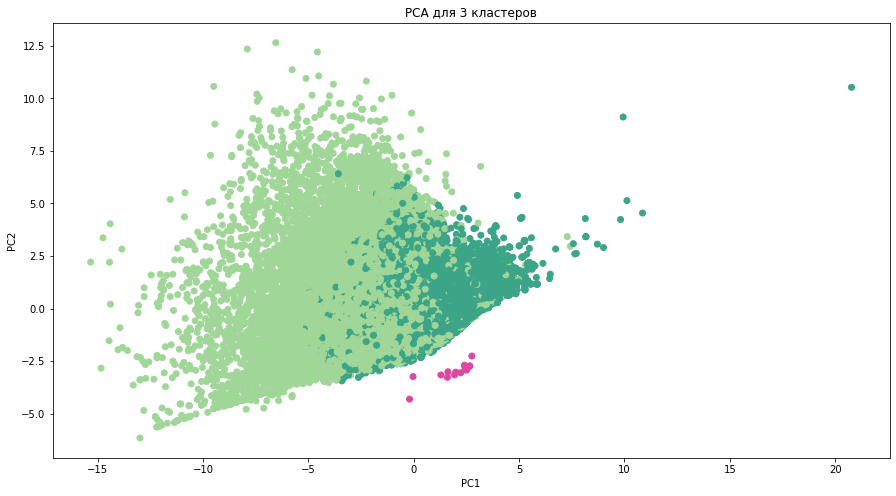

In [50]:
np.random.seed(42)
colors = np.sqrt(np.random.randint(0, 255, size=(3, 3))/255)
c_arr = np.array(list(map(lambda x: colors[x], hac.labels_)))

plt.figure(figsize=(15, 8))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA для 3 кластеров')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=c_arr)

In [51]:
silhouette_score(X, hac.labels_)

0.1580344348832282

In [4]:
hac = AgglomerativeClustering(n_clusters = 4, affinity = "euclidean", linkage = "ward")  
hac.fit(X)

AgglomerativeClustering(n_clusters=4)

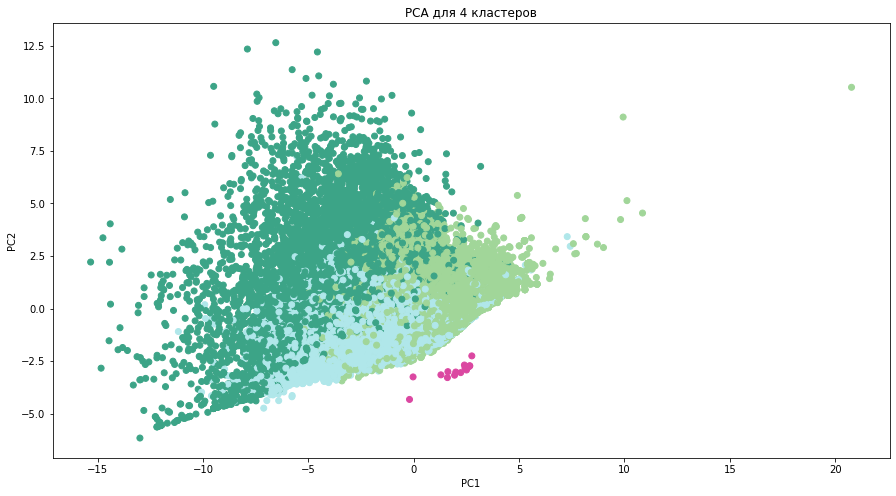

In [7]:
np.random.seed(42)
colors = np.sqrt(np.random.randint(0, 255, size=(4, 3))/255)
c_arr = np.array(list(map(lambda x: colors[x], hac.labels_)))

plt.figure(figsize=(15, 8))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA для 4 кластеров')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=c_arr)

In [10]:
silhouette_score(X, hac.labels_)

0.13734270372855406

In [21]:
score_silhoutte_hac = []
score_davies_bouldin_hac = []
calinski_harabasz_score_hac = []

for i in range(2, 12):
    hac = AgglomerativeClustering(n_clusters = i, affinity = "euclidean", linkage = "ward")  
    hac.fit(X)
    score_silhoutte_hac.append(silhouette_score(X, hac.labels_))
    score_davies_bouldin_hac.append(davies_bouldin_score(X, hac.labels_))
    calinski_harabasz_score_hac.append(calinski_harabasz_score(X, hac.labels_))

In [25]:
print(score_silhoutte_hac,
score_davies_bouldin_hac,
calinski_harabasz_score_hac)

[0.15693575940791085, 0.1580344348832282, 0.13734270372855406, 0.09601724493248337, 0.10459035613672568, 0.10441668317175597, 0.1327841614468281, 0.1329802509570068, 0.16227641374379964, 0.1632936317447734] [2.417989329654002, 1.8413034177822707, 2.027906434244861, 2.007584465305415, 1.8705349843085493, 1.6292091254771177, 1.6315426919126639, 1.3682885776190745, 1.3478987616726061, 1.2281928528199855] [4615.935792747499, 4076.088209218326, 3859.4838277420613, 3526.95200528506, 3345.767418228742, 3258.5304276922348, 3223.843384902707, 3221.9554971143093, 3242.694283344194, 3262.5865328617697]


In [88]:
score_silhoutte_hac = [0.15693575940791085, 0.1580344348832282, 0.13734270372855406, 0.09601724493248337, 0.10459035613672568, 0.10441668317175597, 0.1327841614468281, 0.1329802509570068, 0.16227641374379964, 0.1632936317447734]
score_davies_bouldin_hac = [2.417989329654002, 1.8413034177822707, 2.027906434244861, 2.007584465305415, 1.8705349843085493, 1.6292091254771177, 1.6315426919126639, 1.3682885776190745, 1.3478987616726061, 1.2281928528199855]
calinski_harabasz_score_hac = [4615.935792747499, 4076.088209218326, 3859.4838277420613, 3526.95200528506, 3345.767418228742, 3258.5304276922348, 3223.843384902707, 3221.9554971143093, 3242.694283344194, 3262.5865328617697]

# EM

In [41]:
gmm = GaussianMixture(n_components=3)
gmm.fit(X)

cluster = gmm.fit_predict(X)

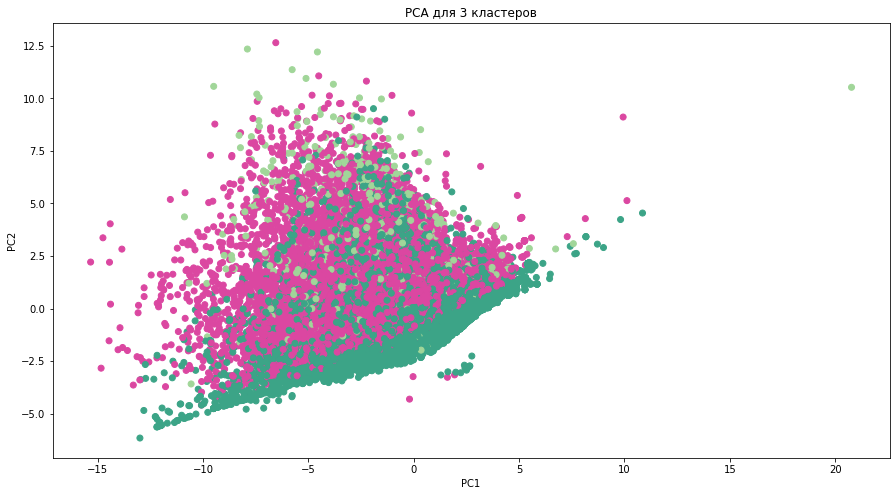

In [44]:
np.random.seed(42)
colors = np.sqrt(np.random.randint(0, 255, size=(3, 3))/255)
c_arr = np.array(list(map(lambda x: colors[x], cluster)))

plt.figure(figsize=(15, 8))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA для 3 кластеров')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=c_arr)

In [45]:
silhouette_score(X, cluster)

0.14151043118611809

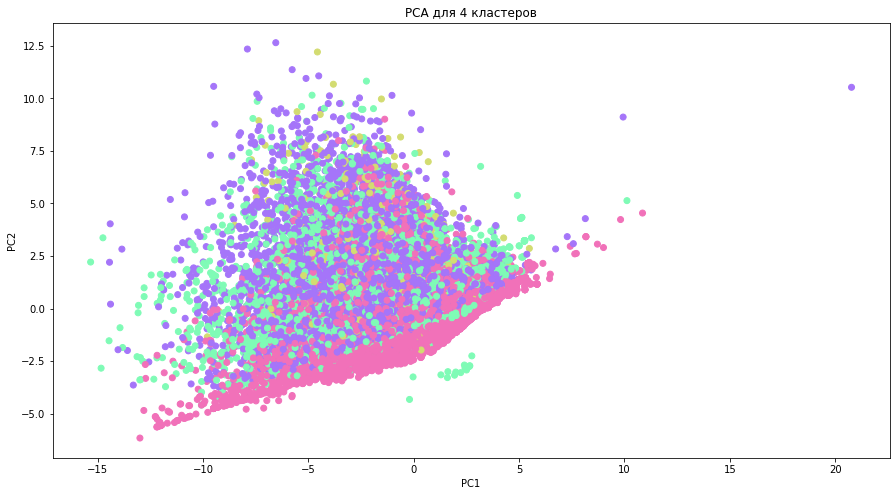

In [13]:
gmm = GaussianMixture(n_components=4)
gmm.fit(X)
cluster = gmm.fit_predict(X)


colors = np.sqrt(np.random.randint(0, 255, size=(4, 3))/255)
c_arr = np.array(list(map(lambda x: colors[x], cluster)))
cluster = gmm.fit_predict(X)
plt.figure(figsize=(15, 8))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA для 4 кластеров')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=c_arr)

In [14]:
silhouette_score(X, cluster)

0.11860261756722273

## Подсчет метрик для разного количества кластеров у кластеризаций 

In [19]:
score_silhoutte_EM = []
score_davies_bouldin_EM = []
calinski_harabasz_score_EM = []
for i in range(5):
    score_silhoutte_EM_k = []
    score_davies_bouldin_EM_k = []
    calinski_harabasz_score_EM_k = []
    for k in range(2, 12):
        gmm = GaussianMixture(n_components=4)
        gmm.fit(X)
        clusters_EM = gmm.fit_predict(X)
        score_silhoutte_EM_k.append(silhouette_score(X, clusters_EM))
        score_davies_bouldin_EM_k.append(davies_bouldin_score(X, clusters_EM))
        calinski_harabasz_score_EM_k.append(calinski_harabasz_score(X, clusters_EM))
    score_silhoutte_EM.append(score_silhoutte_EM_k)
    score_davies_bouldin_EM.append(score_davies_bouldin_EM_k)
    calinski_harabasz_score_EM.append(calinski_harabasz_score_EM_k)

In [32]:
print(score_silhoutte_EM
,'\n\n',score_davies_bouldin_EM
,'\n\n',calinski_harabasz_score_EM)

[[0.09289816241423217, 0.14549396507530674, 0.09297408580820471, 0.11223756608044198, 0.14631868938685771, 0.18900742185339223, 0.0795430196613575, 0.09290207433362373, 0.09296999178399803, 0.1512855890720835], [0.07238865961180371, 0.09297408580820471, 0.09289816241423217, 0.09294860352561646, 0.06634051802825708, 0.0920056426232268, 0.07874496836845982, 0.14473665930902355, 0.14473665930902355, 0.10723535302546092], [0.1410599135560277, 0.09253151585723571, 0.11860354687651432, 0.189314443948307, 0.08845219234772485, 0.11860354687651432, 0.09290207433362373, 0.15306464758697907, 0.11860904031175802, 0.10831163976324355], [0.14864879449774968, 0.09289816241423217, 0.09443571170133339, 0.11860354687651432, 0.1378897398718936, 0.05822130064393249, 0.1278489924206401, 0.09266824489585983, 0.08852208371761339, 0.09297408580820471], [0.09296999178399803, 0.14216686513258123, 0.1410599135560277, 0.09296518165843842, 0.07903314029452234, 0.11688940362853233, 0.10691166605200815, 0.0787449683

In [77]:
calinski_harabasz_score_EM = [[1289.0817778533633, 1766.5730828611645, 1288.0493436869756, 1948.220679859053, 1883.299582543329, 1675.2812154424878, 1396.9282605729547, 1289.2689519602445, 1287.868014176615, 1309.150611531377], [1128.9829617590724, 1288.0493436869754, 1289.0817778533633, 1288.0122602323354, 1414.6614724591864, 1363.597146241792, 1351.3225623736764, 1137.0740468855352, 1137.0740468855352, 1017.4673943225088], [2133.311393414578, 1359.3867468873316, 1476.7691174619836, 1674.1300532961893, 1381.2619531664866, 1476.7691174619831, 1289.2689519602438, 1603.5013437911186, 1476.8440308459824, 1623.7083615598137], [1283.5924306777465, 1289.0817778533633, 1609.698950702623, 1476.7691174619836, 1148.9392674601756, 1167.9873563881379, 1754.6753532033213, 1341.8107771818195, 1401.6635231663845, 1288.0493436869754], [1287.868014176615, 1094.4979874272508, 2133.311393414578, 1287.7033877057029, 1348.4802238086083, 1294.733460785021, 1396.3931862209338, 1351.3225623736764, 1116.7932610959215, 1098.617335968669]]
score_davies_bouldin_EM = [[3.8080770661032735, 2.4619521825281567, 3.809650365940652, 3.234018173659285, 3.205276938035685, 3.245855919986495, 3.601500474131708, 3.807253595988791, 3.8103844195077885, 4.25914610254173], [4.339499923943816, 3.809650365940652, 3.808077066103273, 3.810156690391347, 3.6283906054228194, 3.8060181980693244, 3.6861468287849473, 3.346112263449192, 3.346112263449192, 4.0461121276714005], [2.8782790991575897, 3.6513136023454043, 3.4853467698072937, 3.248737395103803, 3.7638100406678365, 3.4853467698072937, 3.807253595988791, 3.647625919922284, 3.4854079076232356, 3.593573030134775], [4.495163536426198, 3.808077066103273, 3.264470928913221, 3.485346769807294, 3.6782986393899932, 3.6947565427698073, 3.036301840695011, 3.71113820841953, 3.7648084394321617, 3.809650365940652], [3.8103844195077885, 3.2901239744711805, 2.87827909915759, 3.8106132132067767, 3.687281161907639, 4.023534600134174, 3.727339015936142, 3.6861468287849473, 3.3493962690321344, 3.2798093001114488]] 
score_silhoutte_EM = [[0.09289816241423217, 0.14549396507530674, 0.09297408580820471, 0.11223756608044198, 0.14631868938685771, 0.18900742185339223, 0.0795430196613575, 0.09290207433362373, 0.09296999178399803, 0.1512855890720835], [0.07238865961180371, 0.09297408580820471, 0.09289816241423217, 0.09294860352561646, 0.06634051802825708, 0.0920056426232268, 0.07874496836845982, 0.14473665930902355, 0.14473665930902355, 0.10723535302546092], [0.1410599135560277, 0.09253151585723571, 0.11860354687651432, 0.189314443948307, 0.08845219234772485, 0.11860354687651432, 0.09290207433362373, 0.15306464758697907, 0.11860904031175802, 0.10831163976324355], [0.14864879449774968, 0.09289816241423217, 0.09443571170133339, 0.11860354687651432, 0.1378897398718936, 0.05822130064393249, 0.1278489924206401, 0.09266824489585983, 0.08852208371761339, 0.09297408580820471], [0.09296999178399803, 0.14216686513258123, 0.1410599135560277, 0.09296518165843842, 0.07903314029452234, 0.11688940362853233, 0.10691166605200815, 0.07874496836845982, 0.14693969466279103, 0.1397914944493479]] 

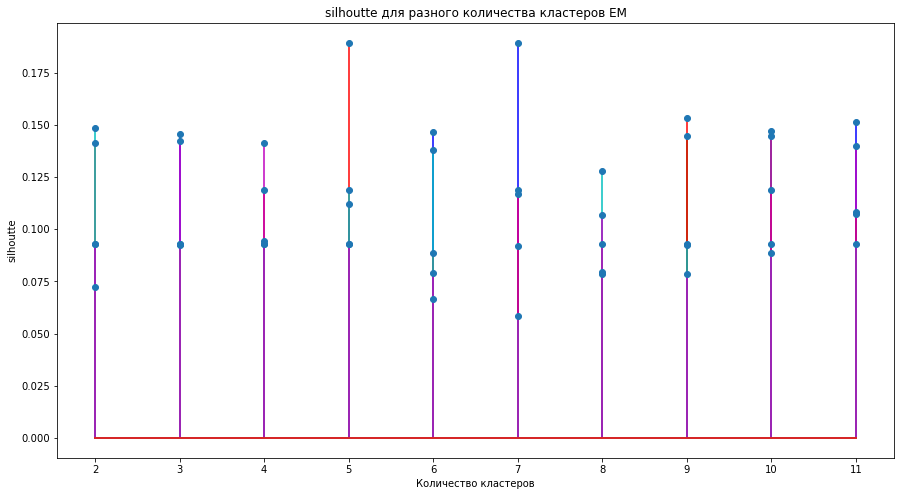

In [80]:
plt.figure(figsize=(15, 8))

# plt.axvline(3, 0, 1, color='grey')
# plt.axvline(7, 0, 1, color='grey')
K = range(2, 12)
col = ['b','g','r','c','m','y','k']
for i in range(5):
    plt.stem(K, score_silhoutte_EM[i], col[i])

plt.xticks(np.arange(2, 12, step = 1))
plt.xlabel('Количество кластеров')
plt.ylabel('silhoutte')
plt.title('silhoutte для разного количества кластеров EM')
plt.show()

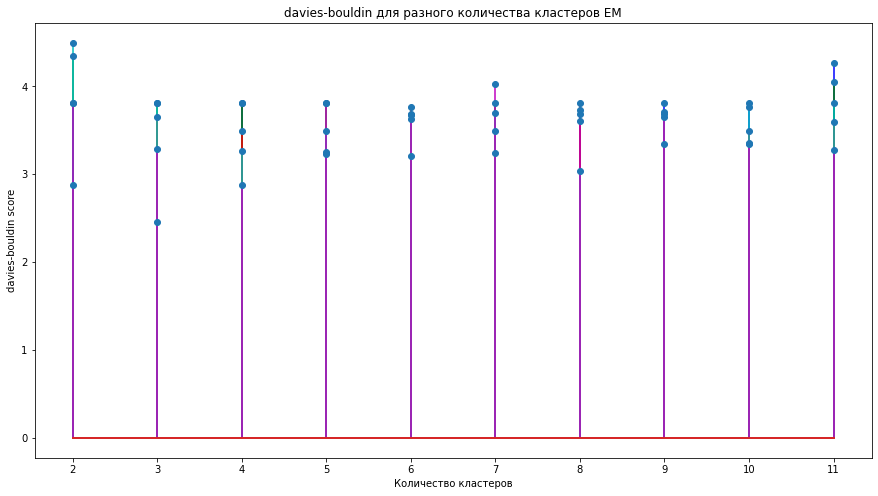

In [81]:
plt.figure(figsize=(15, 8))

# plt.axvline(3, 0, 1, color='grey')
# plt.axvline(7, 0, 1, color='grey')
K = range(2, 12)
col = ['b','g','r','c','m','y','k']
for i in range(5):
    plt.stem(K, score_davies_bouldin_EM[i], col[i])

plt.xticks(np.arange(2, 12, step = 1))
plt.xlabel('Количество кластеров')
plt.ylabel('davies-bouldin score')
plt.title('davies-bouldin для разного количества кластеров EM')
plt.show()

In [70]:
calinski_harabasz_score_EM[0]

[1289.0817778533633,
 1766.5730828611645,
 1288.0493436869756,
 1948.220679859053,
 1883.299582543329,
 1675.2812154424878,
 1396.9282605729547,
 1289.2689519602445,
 1287.868014176615,
 1309.150611531377]

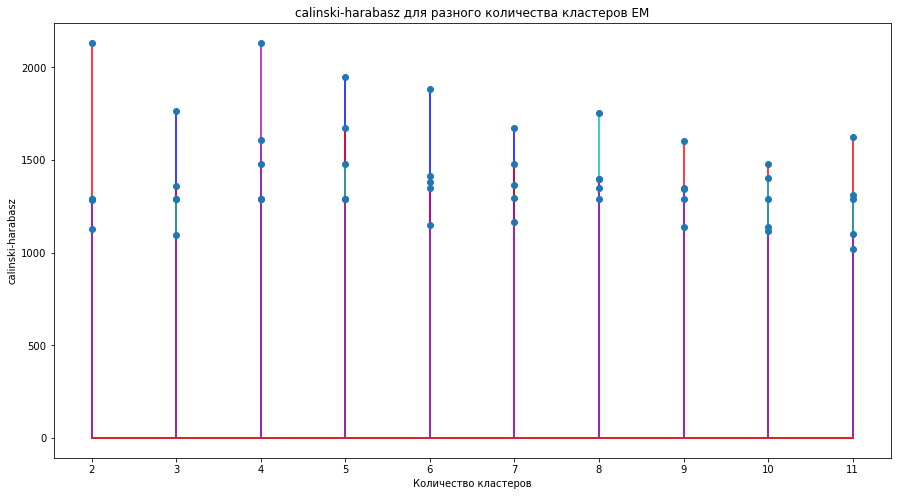

In [75]:
plt.figure(figsize=(15, 8))

# plt.axvline(3, 0, 1, color='grey')
# plt.axvline(7, 0, 1, color='grey')
K = range(2, 12)
col = ['b','g','r','c','m','y','k']
for i in range(5):
    plt.stem(K, calinski_harabasz_score_EM[i], col[i])

plt.xticks(np.arange(2, 12, step = 1))
plt.xlabel('Количество кластеров')
plt.ylabel('calinski-harabasz')
plt.title('calinski-harabasz для разного количества кластеров EM')
plt.show()

Что-то не сходится. Нужно усреднять значение метрики по каждому кластеру 

In [42]:
average_score_silhoutte_EM = []
average_score_davies_bouldin_EM = []
average_calinski_harabasz_score_EM = []
for k in range(10):
    avg_sil = 0
    avg_dav = 0
    avg_cal = 0
    for i in range(5):
        avg_sil += score_silhoutte_EM[i][k]
        avg_dav += score_davies_bouldin_EM[i][k]
        avg_cal += calinski_harabasz_score_EM[i][k]
    average_score_silhoutte_EM.append(avg_sil / 5)
    average_score_davies_bouldin_EM.append(avg_dav / 5)
    average_calinski_harabasz_score_EM.append(avg_cal / 5)

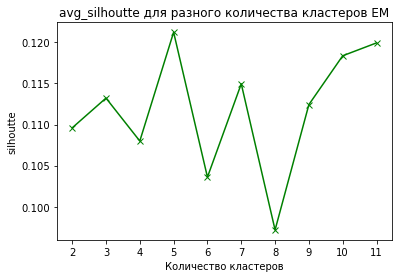

In [44]:
plt.plot(K, average_score_silhoutte_EM, 'bx-', c=col[1])

plt.xticks(np.arange(2, 12, step = 1))
plt.xlabel('Количество кластеров')
plt.ylabel('silhoutte')
plt.title('avg_silhoutte для разного количества кластеров EM')
plt.show()

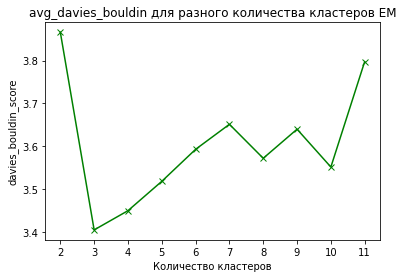

In [85]:
plt.plot(K, average_score_davies_bouldin_EM, 'bx-', c=col[1])

plt.xticks(np.arange(2, 12, step = 1))
plt.xlabel('Количество кластеров')
plt.ylabel('davies_bouldin_score')
plt.title('avg_davies_bouldin для разного количества кластеров EM')
plt.show()

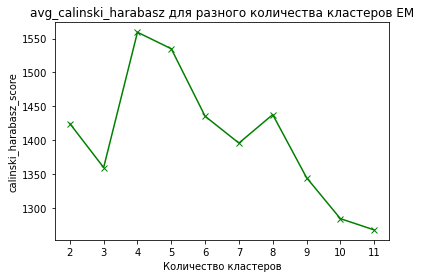

In [86]:
plt.plot(K, average_calinski_harabasz_score_EM, 'bx-', c=col[1])

plt.xticks(np.arange(2, 12, step = 1))
plt.xlabel('Количество кластеров')
plt.ylabel('calinski_harabasz_score')
plt.title('avg_calinski_harabasz для разного количества кластеров EM')
plt.show()

In [45]:
print(average_score_silhoutte_EM
,'\n\n',    average_score_davies_bouldin_EM
,'\n\n',    average_calinski_harabasz_score_EM)

[0.10959310437276226, 0.1132129188575121, 0.10799428407126244, 0.12121386841786363, 0.1036068559858511, 0.11494546312511962, 0.09719014416721786, 0.1124233188987892, 0.11835549395703679, 0.11991963242366813] 

 [3.866280809027733, 3.4042234382777337, 3.4491648459844058, 3.517774448433701, 3.5926114770847946, 3.6511024061534187, 3.5717083511073198, 3.6396553633129485, 3.5512218598089027, 3.797658185280001] 

 [1424.567315576275, 1359.5177877432168, 1559.3821166239045, 1534.967099711053, 1435.3284998875574, 1395.673659263884, 1437.717662866226, 1344.5955364384788, 1284.0485752340876, 1267.3986094138688]


In [82]:
average_score_silhoutte_EM = [0.10959310437276226, 0.1132129188575121, 0.10799428407126244, 0.12121386841786363, 0.1036068559858511, 0.11494546312511962, 0.09719014416721786, 0.1124233188987892, 0.11835549395703679, 0.119919632423]
average_score_davies_bouldin_EM = [3.866280809027733, 3.4042234382777337, 3.4491648459844058, 3.517774448433701, 3.5926114770847946, 3.6511024061534187, 3.5717083511073198, 3.6396553633129485, 3.5512218598089027, 3.797658185280001] 
average_calinski_harabasz_score_EM = [1424.567315576275, 1359.5177877432168, 1559.3821166239045, 1534.967099711053, 1435.3284998875574, 1395.673659263884, 1437.717662866226, 1344.5955364384788, 1284.0485752340876, 1267.3986094138688]

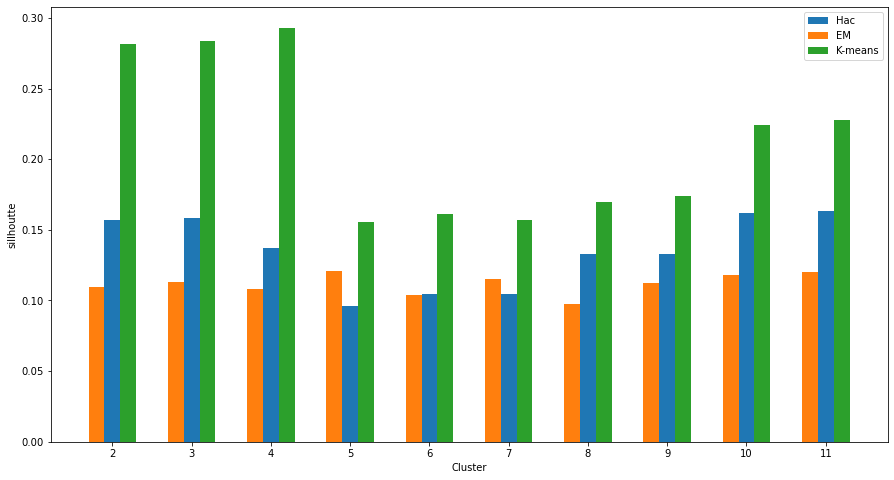

In [89]:
w = 0.2
# score_silhoutte_hac
# average_score_silhoutte_EM
# score_silhoutte_kmean

bar1 = np.arange(2, 12)
bar2 = [i + w for i in bar1]
bar3 = [i + w for i in bar2]

plt.figure(figsize=(15, 8))

plt.bar(bar2, score_silhoutte_hac, w, label='Hac')
plt.bar(bar1, average_score_silhoutte_EM, w, label='EM')
plt.bar(bar3, score_silhoutte_kmean, w, label='K-means')

plt.xlabel("Cluster")
plt.ylabel("sillhoutte")
plt.xticks(bar2, np.arange(2, 12, step = 1))
plt.legend()
plt.show()

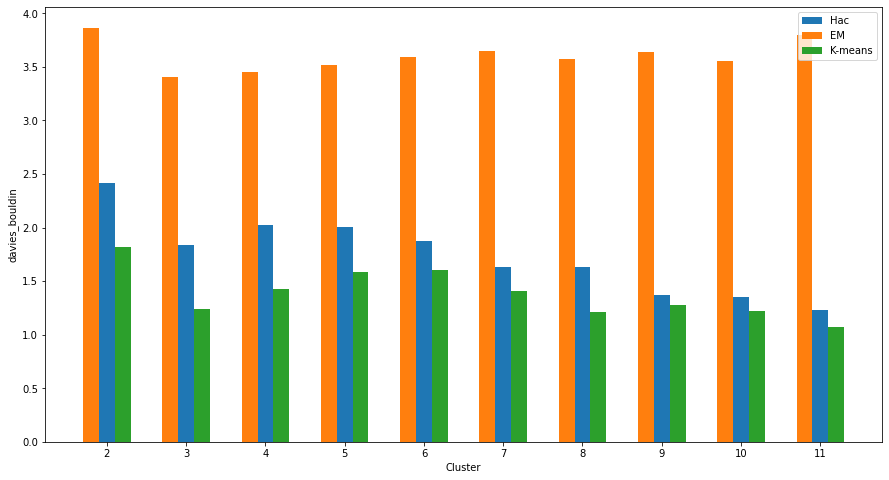

In [23]:
w = 0.2
# score_silhoutte_hac
# average_score_silhoutte_EM
# score_silhoutte_kmean

bar1 = np.arange(2, 12)
bar2 = [i + w for i in bar1]
bar3 = [i + w for i in bar2]

plt.figure(figsize=(15, 8))

plt.bar(bar2, score_davies_bouldin_hac, w, label='Hac')
plt.bar(bar1, average_score_davies_bouldin_EM, w, label='EM')
plt.bar(bar3, score_davies_bouldin_kmean, w, label='K-means')

plt.xlabel("Cluster")
plt.ylabel("davies_bouldin")
plt.xticks(bar2, np.arange(2, 12, step = 1))
plt.legend()
plt.show()

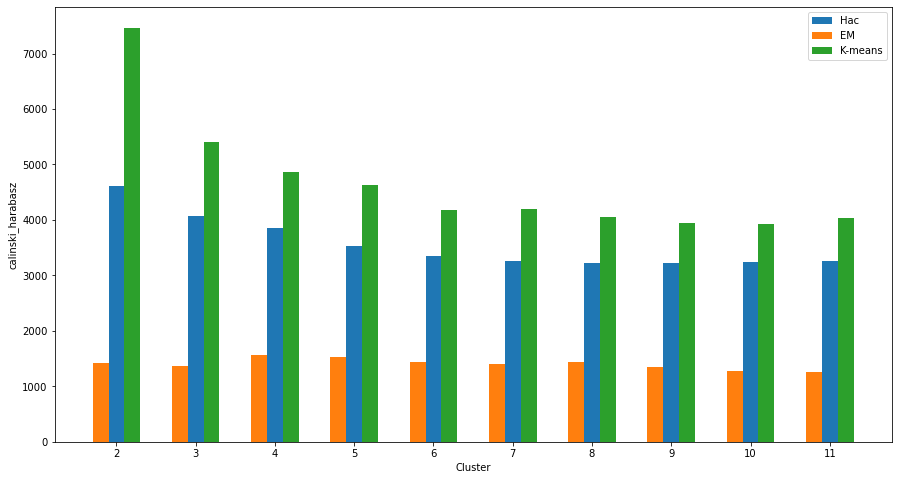

In [24]:
w = 0.2
# score_silhoutte_hac
# average_score_silhoutte_EM
# score_silhoutte_kmean

bar1 = np.arange(2, 12)
bar2 = [i + w for i in bar1]
bar3 = [i + w for i in bar2]

plt.figure(figsize=(15, 8))

plt.bar(bar2, calinski_harabasz_score_hac, w, label='Hac')
plt.bar(bar1, average_calinski_harabasz_score_EM, w, label='EM')
plt.bar(bar3, calinski_harabasz_score_kmean, w, label='K-means')

plt.xlabel("Cluster")
plt.ylabel("calinski_harabasz")
plt.xticks(bar2, np.arange(2, 12, step = 1))
plt.legend()
plt.show()